In [28]:
from collections import Counter
from math import pi
import numpy as np
import pandas as pd
from bokeh.io import output_notebook
from bokeh.palettes import Category20c, Accent
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

In [29]:
df_cluster=pd.read_csv('./result/cluster_result.csv',header=0) 
df_tweets_sa=pd.read_csv('./result/tweets_sa_result.csv',header=0)
df_comments_sa=pd.read_csv('./result/comments_sa_result.csv',header=0)
df_comments=pd.read_csv('./data/Comments.csv',header=0)

In [30]:
df=df_tweets_sa.merge(df_cluster)
data_label=df.groupby(['label']).count()
data_label

,id,sentiment
label,,
0,2,2
1,136,136
2,1093,1093
3,210,210
4,157,157
5,70,70
6,14,14
7,364,364
8,104,104


In [31]:
data_label['angle'] = data_label['id']/data_label['id'].sum() * 2*pi
data_label['color'] = Category20c[10]

p_label = figure(plot_height=350, title="The cluster result of tweets",toolbar_location=None,
           tools="hover", tooltips="label @label: @id",x_range=(-0.5, 1.0))

p_label.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='label', source=data_label)

p_label.axis.axis_label=None
p_label.axis.visible=False
p_label.grid.grid_line_color = None

In [32]:
output_notebook()
show(p_label)

Loading BokehJS ...

In [33]:
data_comments = df_comments_sa.groupby('sentiment').count()
data_comments

,id
sentiment,
neg,16379
pos,28621


In [34]:
data_comments['angle'] = data_comments['id']/data_comments['id'].sum() * 2*pi
data_comments['color'] = ['#3182bd','#ff7f0e']

p_comments = figure(plot_height=350, title="Followers' attitudes",toolbar_location=None,
           tools="hover", tooltips="@sentiment: @id",x_range=(-0.5, 1.0))

p_comments.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='sentiment', source=data_comments)

p_comments.axis.axis_label=None
p_comments.axis.visible=False
p_comments.grid.grid_line_color = None

In [35]:
output_notebook()
show(p_comments)

Loading BokehJS ...

In [36]:
data_tweets = df_tweets_sa.groupby('sentiment').count()
data_tweets

,id
sentiment,
neg,1002
pos,1308


In [37]:
data_tweets['angle'] = data_tweets['id']/data_tweets['id'].sum() * 2*pi
data_tweets['color'] = ['#3182bd','#ff7f0e']

p_tweets = figure(plot_height=350, title="President Trump's attitude",toolbar_location=None,
           tools="hover", tooltips="@sentiment: @id",x_range=(-0.5, 1.0))

p_tweets.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='sentiment', source=data_tweets)

p_tweets.axis.axis_label=None
p_tweets.axis.visible=False
p_tweets.grid.grid_line_color = None

In [38]:
output_notebook()
show(p_tweets)

Loading BokehJS ...

In [39]:
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.core.properties import value

In [40]:
df_cluster=pd.read_csv('./result/cluster_result.csv',header=0) 
df_tweets_sa=pd.read_csv('./result/tweets_sa_result.csv',header=0)

In [41]:
df = df_tweets_sa.merge(df_cluster)
d2 = df.groupby(by = ['label','sentiment'])
d2.size()

label  sentiment
0      pos            2
1      neg           84
       pos           52
2      neg          458
       pos          635
3      neg          105
       pos          105
4      neg           91
       pos           66
5      neg           20
       pos           50
6      neg            7
       pos            7
7      neg           88
       pos          276
8      neg           64
       pos           40
9      neg           85
       pos           75
dtype: int64

In [42]:
cluster_result = ['0','1', '2', '3', '4', '5', '6','7','8','9']
attitudes = ["neg", "pos"]
colors = ['#1f77b4', '#ff7f0e']

data = {'cluster_result' : cluster_result,
        'neg'   : [0,84,458,105,91,20,7,88,64,85],
        'pos'   : [2, 52,635, 105, 66, 50,7,276,40,75]}

p = figure(x_range=cluster_result, plot_height=350, title="Sentiment analysis by cluster result",
           toolbar_location=None, tools="hover", tooltips="$name : @data")

p.vbar_stack(attitudes, x='cluster_result', width=0.9, color=colors, source=data,
             legend=[value(x) for x in attitudes])

p.y_range.start = 0
p.x_range.range_padding = 0.2
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "vertical"


In [43]:
output_notebook()
show(p)

Loading BokehJS ...

In [44]:
import numpy as np
import pandas as pd
from bokeh.io import output_notebook,show
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool

In [45]:
df_tweets_sa=pd.read_csv('./result/tweets_sa_result.csv',header=0)
df_comments_sa=pd.read_csv('./result/comments_sa_result.csv',header=0)
df_comments=pd.read_csv('./data/Comments.csv',header=0)

In [46]:
#Find the tweets with the most comments
dt = df_comments['reply_id'].value_counts().head(3)
dt

1065743662464802817    3365
1064216956679716864    3364
1064540462848098304    2857
Name: reply_id, dtype: int64

In [47]:
#Sort above comments chronologically
ds = df_comments.loc[df_comments['reply_id']==1065743662464802817]
dm = ds.merge(df_comments_sa).sort_values(by="id")

#Add a new coloum to record the changing of sentiment
dm['sentiment_change']='0'

#Set neg=-1, pos=1
da = dm.replace('neg',-1)
db = da.replace('pos',1)

#Calculate the result by rows
db['sentiment_change']=db['sentiment'].cumsum()
db

,id,reply_id,text,user_id,sentiment,sentiment_change
2810,1065744654061039616,1065743662464802817,@realDonaldTrump Their job is to celebrate hol...,28352795,-1,-1
2809,1065744654367375366,1065743662464802817,@realDonaldTrump It's the Communists that want...,766148797,-1,-2
2808,1065744657152270336,1065743662464802817,@realDonaldTrump Is it 2020 yet?,18384246,-1,-3
2807,1065744657714278400,1065743662464802817,@realDonaldTrump You’re doing a fantastic job ...,3073381675,1,-2
2806,1065744657827733506,1065743662464802817,@realDonaldTrump It is time to ignore the cour...,822527549871788032,1,-1
2805,1065744662059720705,1065743662464802817,@realDonaldTrump Total BUNK! Fair immigration...,815903749021593601,1,0
2804,1065744662684565505,1065743662464802817,"@realDonaldTrump Cry,cry,https://t.co/pW5q12e1...",32863779,-1,-1
2803,1065744664223862784,1065743662464802817,@realDonaldTrump Take a day off the golf cours...,781960412161937408,1,0
2802,1065744664752353280,1065743662464802817,@realDonaldTrump There are many circuits with ...,569005726,-1,-1
2801,1065744666610606082,1065743662464802817,@realDonaldTrump But...YOU never win a lawsuit???,560587423,1,0


In [74]:
x_data = np.arange(3365)
p = figure(plot_width=800, plot_height=400,x_axis_label='Time', y_axis_label='Sentiment')
p.line(x_data, db['sentiment_change'], line_width=2)
p.axis.axis_line_cap=None

In [75]:
output_notebook()
show(p)

Loading BokehJS ...

In [2]:
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /Users/kai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


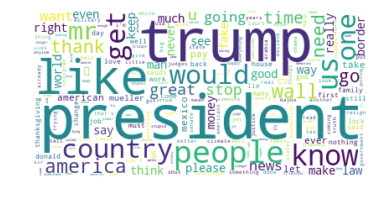

In [8]:
df = pd.read_csv('./data/Comments.csv',header=0)
def get_freq_dist(df, stop_words):
    freqdist = nltk.FreqDist()
    for i in df.index:
        tokens = df.loc[i, 'tokens']
        for token in tokens:
            token = token.lower()
            # skip numbers, @ string, word in stop words set
            if token.isdigit() or token in stop_words or token.startswith('@'):
                continue
            freqdist[token] += 1
    return freqdist
stop_words = set(stopwords.words('english')
                         + list(string.punctuation)
                         + ['..', '...', '“', '’', '”', '‘', '–'])
tknzr = TweetTokenizer()
df['tokens'] = df.apply(lambda row: tknzr.tokenize(row['text']), axis=1)
freq = get_freq_dist(df,stop_words)
wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")


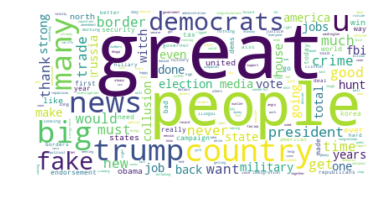

In [4]:
df = pd.read_csv('./data/Tweets.csv',header=0)
def get_freq_dist(df, stop_words):
    freqdist = nltk.FreqDist()
    for i in df.index:
        tokens = df.loc[i, 'tokens']
        for token in tokens:
            token = token.lower()
            # skip numbers, @ string, word in stop words set
            if token.isdigit() or token in stop_words or token.startswith('@'):
                continue
            freqdist[token] += 1
    return freqdist
stop_words = set(stopwords.words('english')
                         + list(string.punctuation)
                         + ['..', '...', '“', '’', '”', '‘', '–'])
tknzr = TweetTokenizer()
df['tokens'] = df.apply(lambda row: tknzr.tokenize(row['text']), axis=1)
freq = get_freq_dist(df,stop_words)
wordcloud = WordCloud(background_color='white').generate_from_frequencies(freq)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
